#Дипломная работа по курсу «Python для анализа данных»

1.	Загрузить файл hr.csv (можно найти во сложении к заданию)
2.	Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)
3.	Рассчитать и визуализировать корреляционную матрицу для переменных
4.	Визуализировать несколько взаимосвязей между переменными
5.	С использованием t-test статистики проверить взаимосвязи между несколькими переменными
6.	Рассчитать сколько работников работает в каждом департаменте
7.	Показать распределение сотрудников по зарплатам
8.	Показать распределение сотрудников по зарплатам совместно с департаментами
9.	Сколько сотрудников покинули компанию
10.	Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию
11.	Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте

Пояснения к колонкам:

1. satisfaction_level - уровень удовлетворенности работой
2. last_evaluation - уровень последней оценки работы
3. number_project -количество проектов
4. average_montly_hours - среднее количество часов в месяц работы
5. time_spend_company - шкала от 2 до 10, отражающее время работы в компании
6. Work_accident - наличие инцидента на рабочем месте
7. left - ушел ли работник или нет
8. promotion_last_5years - факт повышения в течение 5 лет
9. sales - департамент работника
10. salary - уровень зарплаты


In [1]:
import pandas as pd 

##1. Загрузить файл hr.csv 

In [2]:
df = pd.read_csv("HR.csv")
#df

##2.	Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [3]:
stat_df = df.agg(['mean','median','min','max','std'])
stat_df.loc['mode'] = df.mode().loc[0]
stat_df.loc['mode','average_montly_hours'] = df.mode()['average_montly_hours'].mean()
stat_df = stat_df.T

In [4]:
stat_df

,mean,median,min,max,std,mode
satisfaction_level,0.612834,0.64,0.09,1,0.248631,0.1
last_evaluation,0.716102,0.72,0.36,1,0.171169,0.55
number_project,3.80305,4,2,7,1.23259,4
average_montly_hours,201.05,200,96,310,49.9431,145.5
time_spend_company,3.49823,3,2,10,1.46014,3
Work_accident,0.14461,0,0,1,0.351719,0
left,0.238083,0,0,1,0.425924,0
promotion_last_5years,0.0212681,0,0,1,0.144281,0
sales,NaN,NaN,IT,technical,NaN,sales
salary,NaN,NaN,high,medium,NaN,low


##3.	Рассчитать и визуализировать корреляционную матрицу для переменных

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

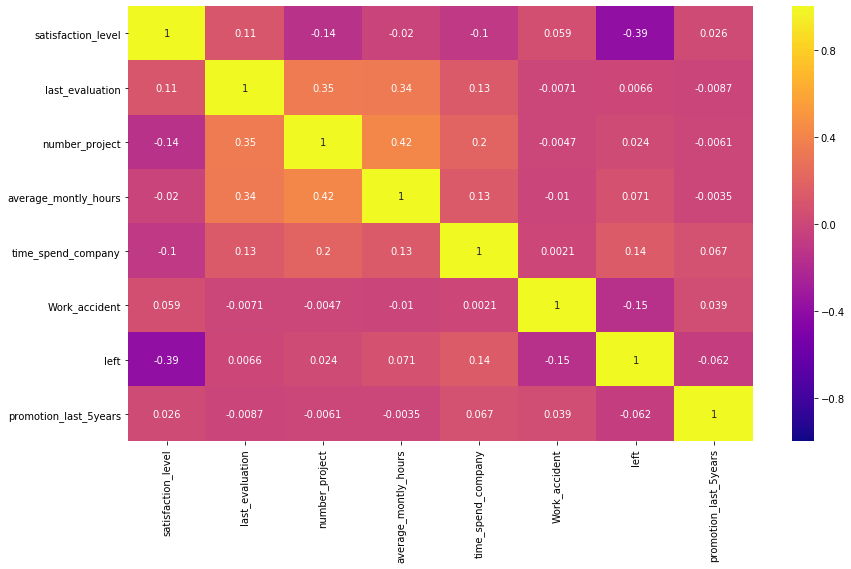

In [9]:
corr_matrix = round(df.corr(), 6)
fig, ax = plt.subplots(figsize=(14, 8))
x = sns.heatmap(corr_matrix, cmap=sns.color_palette("plasma", 1000), vmin=-1, center=0, annot=True)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)
plt.show()

Явно коррелирующих параметров нет. Однако можно отметить "повышенную" корреляцию между такими параметрами, как:

- satisfaction_level - left (обратная связь)
- last_evaluation - number_project (прямая связь)
- avarage_number_hours - number_project (прямая связь)

##4.	Визуализировать несколько взаимосвязей между переменными

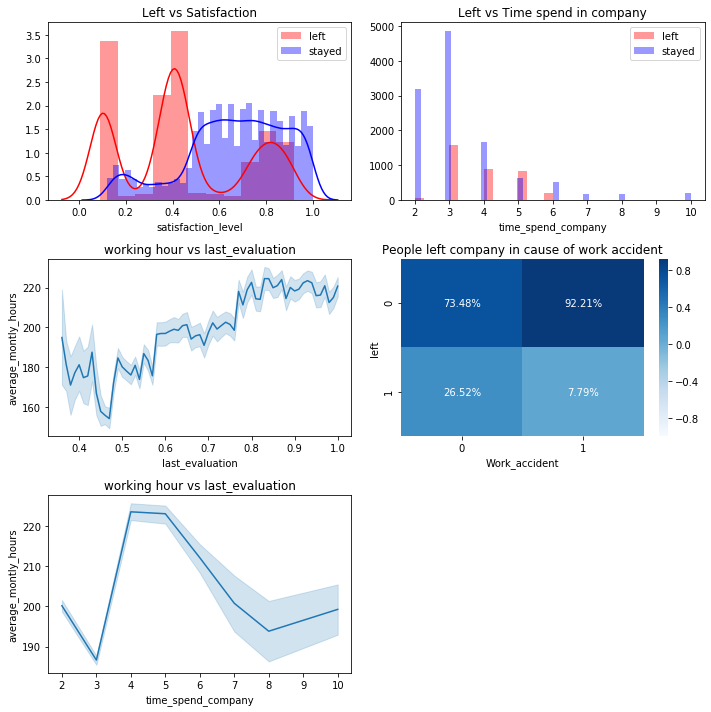

In [10]:
plt.figure(figsize=(10,10))

plt.subplot(321)
sns.distplot(df[df['left']==1]['satisfaction_level'], label='left', color='Red')
sns.distplot(df[df['left']==0]['satisfaction_level'], label='stayed', color='Blue')
plt.title('Left vs Satisfaction')
plt.legend()

plt.subplot(322)
sns.distplot(df[df['left']==1]['time_spend_company'], label='left', color='Red',kde=False)
sns.distplot(df[df['left']==0]['time_spend_company'], label='stayed', color='Blue',kde=False)
plt.title('Left vs Time spend in company')
plt.legend()

plt.subplot(323)
sns.lineplot(x='last_evaluation',y='average_montly_hours',data=df)
plt.title('working hour vs last_evaluation')

plt.subplot(324)
cds = df.pivot_table(index='left',columns='Work_accident', values='sales',aggfunc='count')
cds = cds/df['Work_accident'].value_counts()
plt.title('People left company in cause of work accident', )
ax =sns.heatmap(cds, cmap=sns.color_palette("Blues", 1000), vmin=-1, center=0, annot=True, fmt='.2%')
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)

plt.subplot(325)
sns.lineplot(x='time_spend_company',y='average_montly_hours',data=df)
plt.title('working hour vs last_evaluation')

plt.tight_layout()
plt.show()

##5.	С использованием t-test статистики проверить взаимосвязи между несколькими переменными

 Для анализа будем использовать определение t-критерия для средних двух выборок.
 
 Для теста возьмем следующие пары:

1. satisfaction_level - last_evaluation
2. number_project - time_spend_company
3. left - Work_accident
4. Work_accident - promotion_last_5years
5. promotion_last_5years - left

In [58]:
from scipy import stats

In [59]:
ttest = stats.ttest_ind(df['satisfaction_level'], df['last_evaluation'])
print(f'Уровнь значимости: {ttest. pvalue}')

Уровнь значимости: 0.0


In [60]:
ttest = stats.ttest_ind(df['number_project'], df['time_spend_company'])
print(f'Уровнь значимости: {ttest.pvalue}')

Уровнь значимости: 1.7938911515379e-84


In [61]:
ttest = stats.ttest_ind(df['left'], df['Work_accident'])
print(f'Уровнь значимости: {ttest.pvalue}')

Уровнь значимости: 9.625063899986344e-95


In [62]:
ttest = stats.ttest_ind(df['Work_accident'], df['promotion_last_5years'])
print(f'Уровнь значимости: {ttest.pvalue}')

Уровнь значимости: 0.0


In [63]:
ttest = stats.ttest_ind(df['promotion_last_5years'], df['left'])
print(f'Уровнь значимости: {ttest.pvalue}')

Уровнь значимости: 0.0


По полученным данным можно сделать вывод, что гипотезу о равенстве средних принять нельзя, так как уровень значимости каждой пары крайне мал

##6. Рассчитать сколько работников работает в каждом департаменте

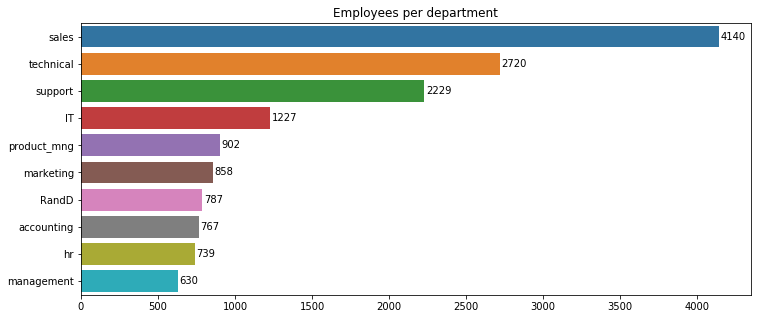

In [64]:
cds = df['sales'].value_counts()

plt.figure(figsize=(12,5))
sns.barplot(x=cds.values, y=cds.index)
for y,x in enumerate(cds.values):
    plt.text(x+10,y+0.1 ,x)
plt.title('Employees per department')
plt.show()

##7. Показать распределение сотрудников по зарплатам

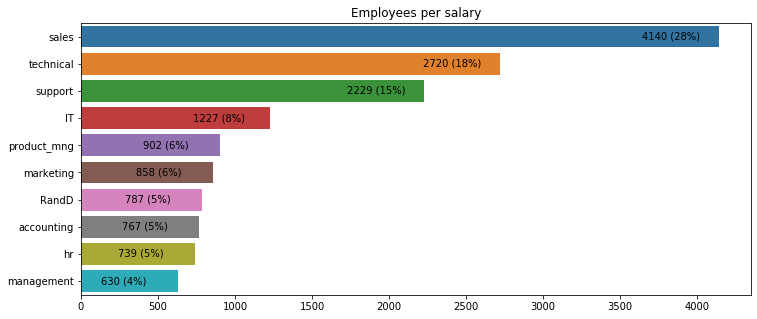

In [65]:
plt.figure(figsize=(12,5))
sns.barplot(x=cds.values, y=cds.index)
for y,x in enumerate(cds.values):
    plt.text(x-500,y+0.1 ,f'{x} ({x/len(df):.0%})')
plt.title('Employees per salary')
plt.show()

##8. Показать распределение сотрудников по зарплатам совместно с департаментами

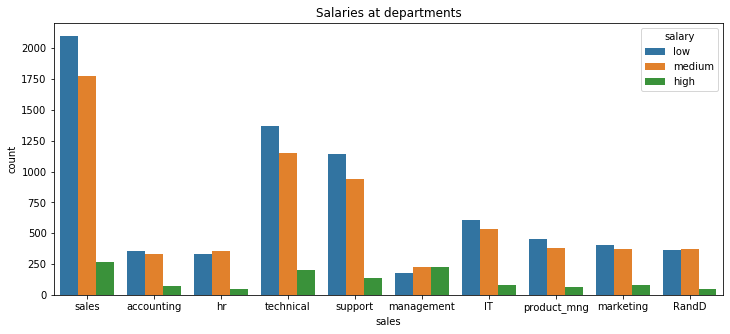

In [66]:
plt.figure(figsize=(12,5))
sns.countplot(x='sales',hue='salary',data=df)
plt.xticks(rotation=0)
plt.title('Salaries at departments')
plt.show()

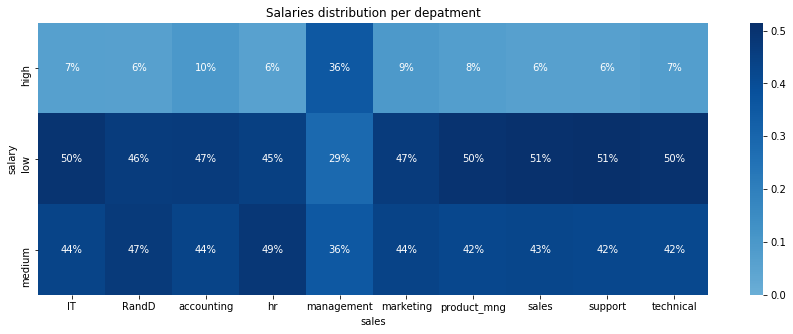

In [12]:
plt.figure(figsize=(15,5))
cds = df.pivot_table(index='salary',columns='sales', values='left', aggfunc='count')
cds = cds/cds.sum()
ax = sns.heatmap(cds, cmap=sns.color_palette("Blues", 1000), vmin=0, center=0, annot=True, fmt='.0%')
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)
plt.title('Salaries distribution per depatment')
plt.show()

##9. Сколько сотрудников покинули компанию

In [68]:
df['left'].agg(['sum','mean']).rename({'sum':'Всего покинуло', 'mean':'Доля от всех сотрудников'})

Всего покинуло              3571.000000
Доля от всех сотрудников       0.238083
Name: left, dtype: float64

##10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

In [69]:
employees_left = df[ df['left'] == 1]
employees_left['satisfaction_level'].mean()

0.44009801176140917

У сотрудников, ушедших из компании, средний уровень удовлетворенности работы равен 0.44. Проверим данную гипотезу спомощью одностороннего t теста:

In [70]:
ttest = stats.ttest_1samp(employees_left['satisfaction_level'], 0.44)
print(f'Уровень значимости {ttest.pvalue}')

Уровень значимости 0.9822967622087426


Так как мы получили очень высокий уровень значимости p_value = 0.9822967622087426, эту гипотезу можно принять

In [71]:
employees_left['promotion_last_5years'].mean()

0.005320638476617194

У сотрудников, ушедших из компании, не было повышения за последние 5 лет, т.е. среднее по параметру promotion_last_5years = 0.005

In [72]:
ttest = stats.ttest_1samp(employees_left['promotion_last_5years'], 0.005)
print(f'Уровень значимости {ttest.pvalue}')

Уровень значимости 0.7922992973682207


Так как мы получили очень высокий уровень значимости p_value = 0.7922992973682207, эту гипотезу можно принять

In [73]:
employees_left['average_montly_hours'].mean()

207.41921030523662

У сотрудников, ушедших из компании, было повышенное кол-во часов работы в месяц, т.е. average_montly_hours = 207

In [74]:
ttest = stats.ttest_1samp(employees_left['average_montly_hours'], 207)
print(f'Уровень значимости {ttest.pvalue}')

Уровень значимости 0.6823346246787895


Так как мы получили очень высокий уровень значимости p_value = 0.6823346246787895, эту гипотезу можно принять

In [75]:
employees_left['last_evaluation'].mean()

0.7181125735088183

У сотрудников, ушедших из компании, была низкая оценка эффктивности, т.е. средняя last_evaluation = 0.7

In [76]:
ttest = stats.ttest_1samp(employees_left['last_evaluation'], 0.7)
print(f'Уровень значимости {ttest.pvalue}')

Уровень значимости 4.6627612824820456e-08


Так как полученный уровень значимости крайне мал, эту гипотезу не следует принимать

По итогу проверги гипотез можно прийти к выводу, что важными для нас параметрами оказались: satisfaction_level, promotion_last_5years, average_montly_hours

In [77]:
# Значения средних, на основе принятых гипотез
satisfaction_mean_estimation = 0.44
promotion_last_5years_mean_estimation = 0.005
average_montly_hours_mean_estimation = 207

low_satis_left = employees_left[(employees_left['satisfaction_level'] <= satisfaction_mean_estimation)]
alot_of_hours_left = employees_left[(employees_left['average_montly_hours'] >= average_montly_hours_mean_estimation)]
no_promotion_left = employees_left[employees_left['promotion_last_5years'] == 0]
low_salary_left = employees_left[employees_left['salary'] == 'low']

total_left = employees_left.shape[0]

print(f"В итоге, процент сотрудников покинувшие компанию изза разных причин:")
print(f"1. Уровень удовлетворенности (<= 0.44): {round(low_satis_left.shape[0] / total_left * 100, 2)}%")
print(f"2. Повышенное кол-во часов работы в месяц (>= 207): {round(alot_of_hours_left.shape[0] / total_left * 100, 2)}%")
print(f"3. Не было повышений в теч 5 лет: {round(no_promotion_left.shape[0] / total_left * 100, 2)}%")
print(f"4. Низкий уровень зп: {round(low_salary_left.shape[0] / total_left * 100, 2)}%")

В итоге, процент сотрудников покинувшие компанию изза разных причин:
1. Уровень удовлетворенности (<= 0.44): 64.58%
2. Повышенное кол-во часов работы в месяц (>= 207): 53.29%
3. Не было повышений в теч 5 лет: 99.47%
4. Низкий уровень зп: 60.82%


В итоге, можно сделать вывод, что, в основном, сотрудники покидают компанию при отсутствии персонального роста и повышений, а также из-за низкого уровеня заработной платы и низкого уровеня удовлетворенности.